# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

---
## GROUP MESSAGE BOARD
### USE THIS FOR CODE REVIEWS YALL!!

1. **DO NOT drop the columns for now since we don't know if any of them would be needed in the future. If you feel the need to drop columns in your data analysis, launch a group vote before doing so.**

---


# Names

- Jared (Ruotian) Chen
- Jimin Cheon
- Kane Gu
- Laurence D'Ercole
- Nisha Davankar

<a id='research_question'></a>
# Research Question

What attributes of a YouTube video affect its popularity in United States?

<a id='background'></a>

## Background & Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


Factors that would potentially **affect** a video's popularity:
- time created: `time`
- duration: `length`
- number of tags: `tags`
- video category: `category`
- video quality: `video.quality`
- ad placement: `has_ad	has_ad_at_beginning`
- popularity of youtuber
    - time youtuber joined youtube: `creator.time`
    - number of followers: `creator.stats.follower`
    - total number of views: `creator.stats.view`
    - total number of videos: `creator.stats.post`

Factors that **determine** a video's long-term popularity:
- like/dislike ratio: `stats.like	stats.dislike`
- number of comments: `stats.comment`
- number of views: `stats.view`

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [42]:
import sys

!{sys.executable} -m pip install --quiet --user --upgrade -r EDA/requirements.txt
!{sys.executable} -m pip install --quiet --user --upgrade pandas==1.* numpy matplotlib seaborn patsy statsmodels

In [43]:
from EDA.goodies import *

In [44]:
from EDA.dcollect import restful
from EDA.dcollect import api_youtube as youtube
from EDA.dcollect import api_youtubei as youtubei

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [46]:
from EDA import utils

dataset_search = utils.EDA.dataset('EDA/dsamples/youtube_search_random_extended_ascii.dataset')
df_search_details = dataset_search.load('youtube_search_details.pkl')
df_search_channels = dataset_search.load('youtube_search_channels.pkl')

dataset_trending = utils.EDA.dataset('EDA/dsamples/youtube_trending.dataset')
df_trending_details = dataset_trending.load('youtube_trending_details.pkl')
df_trending_channels = dataset_trending.load('youtube_trending_channels.pkl')

# Data Cleaning

Describe your data cleaning steps here.

In [47]:
# - ads (filter)
def clean_ads_col(df):
    def filter_has_ad(ads):
        return type(ads) == list
    def filter_has_ad_beginning(ads):
        if type(ads) == type(None) or type(ads) != list:
            return False
            
        for ad in ads:
            if ad['kind'] == youtubei.resource.ad.kinds.START:
                return True
        return False

    df['has_ad'] = df['ads'].apply(filter_has_ad)
    df['has_ad_at_beginning'] = \
            df['ads'].apply(filter_has_ad_beginning)
    df.drop('ads', axis = 'columns', inplace = True)

    
clean_ads_col(df_search_details)
clean_ads_col(df_trending_details)

df_search_details = df_drop_duplicates(df_search_details, level = 'id')
df_trending_details = df_drop_duplicates(df_trending_details, level = 'id')

df_search_details['category'] = df_search_details['category'].astype(str)
df_trending_details['category'] = df_trending_details['category'].astype(str)


df_report(df_search_details, name = 'Search Results')
df_report(df_trending_details, name = 'Trending')

df_report(df_search_channels, name = 'Search Results (Channel Database)')
df_report(df_trending_channels, name = 'Trending (Channel Database)')

---

# Results - Search Results

## Data Preview

,title,description,time,length,tags,category,creator.id,stats.like,stats.dislike,stats.comment,stats.view,video.quality,has_ad,has_ad_at_beginning
id,,,,,,,,,,,,,,
-1K_yQO8P_0,J / Feel Your Blaze,J LIVE and LET RIDE\n@SHIBUYA O-EAST 20081231\...,2017-02-09 15:12:20+00:00,0 days 00:05:46,"[LUNA SEA, J LUNA SEA, Jun Onose, wumf, j feel...",Music,UCSJUUn_KQw1T3gff5mRjblg,291.0,3.0,24.0,48009.0,HD,True,True
-49fGh_Hbhw,My Pet Fish are DYING In My Backyard Pond! Res...,🔹Buy 𝙂𝙊𝙊𝙂𝘼𝙉 𝘽𝘼𝙄𝙏𝙎 -- https://googansquad.com/...,2021-03-09 00:19:41+00:00,0 days 00:24:57,"[fishing, survial, camping, outdoors, cooking,...",Howto & Style,UCI6gB6eZS0c3ZrjcJq7xAtA,5187.0,93.0,648.0,132494.0,HD,True,True
-4z3GvwXCtM,YUMMY FOOD HACKS || Ultimate Snack Hacks You’l...,Whether you’re eating a snack after school or ...,2020-09-11 16:51:36+00:00,0 days 00:10:21,"[DIY, hacks, tricks, craft, crafts, prank, pra...",People & Blogs,UCu_ytbeyzLZfIKWr43QSb5A,76075.0,10207.0,2687.0,10212445.0,HD,True,True
-6-FNvMf56A,Cardi B Meets Cardi E,"For Halloween, Ellen transformed into “Cardi E...",2019-10-31 13:00:00+00:00,0 days 00:06:03,"[plm, ellen, ellen degeneres, the ellen degene...",Entertainment,UCp0hYYBW6IMayGgR-WeoCvQ,465187.0,19911.0,14175.0,23949467.0,HD,True,True
-6aXn_zyyiY,26 IDÉES SPLENDIDES À FAIRE QUAND ON S'ENNUIE,ACTIVITÉS GÉNIALES QUE TU DEVRAIS ESSAYER POUR...,2020-05-06 16:00:00+00:00,0 days 00:13:30,"[fait-maison, art, savoir-faire, astuces, habi...",Howto & Style,UC9TJezP2M1ADmUYVl8hrQ2A,2800.0,248.0,199.0,202986.0,HD,True,True


## Stats

,length,stats.like,stats.dislike,stats.comment,stats.view
count,2209,2.176000e+03,2.176000e+03,2.043000e+03,2.208000e+03
mean,0 days 00:16:01.243549117,3.028353e+05,3.100054e+04,1.812509e+04,4.590095e+07
std,0 days 00:44:13.204714620,1.173375e+06,1.727713e+05,1.322898e+05,2.369428e+08
min,0 days 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0 days 00:03:33,3.610750e+03,8.975000e+01,1.275000e+02,1.054330e+05
50%,0 days 00:07:05,2.271350e+04,8.220000e+02,1.042000e+03,1.176212e+06
75%,0 days 00:14:38,1.217852e+05,6.850000e+03,5.180500e+03,1.150240e+07
max,0 days 15:13:24,2.111358e+07,4.142776e+06,5.198500e+06,4.418250e+09


---

---

# Results - Trending

## Data Preview

,title,description,time,length,tags,category,creator.id,stats.like,stats.dislike,stats.comment,stats.view,video.quality,has_ad,has_ad_at_beginning
id,,,,,,,,,,,,,,
-aToDFwlM1Y,CARMEN RUSHED TO THE HOSPITAL BECAUSE OF MISCA...,Carmen rushed to the hospital signs of miscarr...,2021-03-08 22:31:08+00:00,0 days 00:13:20,"[Carmen and Corey, Carmen’s pregnant, Pregnanc...",People & Blogs,UC2rWFYjCHFcnjNnWhnGvv7Q,33575.0,451.0,4741.0,424684.0,HD,True,True
-hAztPfxZEk,FIRST DAY IN OUR NEW HOME! (HECTIC),LAST VIDEO: \r\n\r\n*MAKE SURE OUR POST NOTIFI...,2021-03-09 03:38:11+00:00,0 days 00:14:23,"[queen Naija, Medicine, Queen, Royalty Squad, ...",Entertainment,UCtj45MepAoKxZoyR_Mnt86Q,29000.0,590.0,1699.0,486158.0,HD,True,True
0L8kRN_bPXM,Big Sean - Deep Reverence ft. Nipsey Hussle,Stream/Download “Detroit 2 https://bigsean.lnk...,2021-03-05 20:00:12+00:00,0 days 00:04:00,"[Big, Sean, Deep, Reverence, Getting, Out, Our...",Music,UC7zOpx9wgvGBCDEjujnAPQA,127902.0,954.0,5635.0,1952919.0,HD,True,True
0OPKk1Hwk9s,Armor Plates Rule in Rainbow Six Siege (Animat...,"You almost did it, Rook... Almost...\n\n• Use ...",2021-03-10 15:15:00+00:00,0 days 00:00:34,"[rainbow six, siege, r6, rainbow six cartoon, ...",Gaming,UCT4ITc4BhHL4CXHYt4Bs9jg,31937.0,98.0,1194.0,270030.0,HD,True,True
0PzWnljCpL0,What Is International Women's Day?,International Women’s Day is celebrated every ...,2021-02-09 05:22:52+00:00,0 days 00:06:00,"[international women's day, what is internatio...",Education,UCvmofFg-oZc4jvBUIfZbjzg,2147.0,207.0,664.0,168160.0,HD,True,True


## Stats

,length,stats.like,stats.dislike,stats.comment,stats.view
count,219,2.190000e+02,219.000000,209.000000,2.190000e+02
mean,0 days 00:10:22.388127853,1.361335e+05,2339.191781,11710.655502,2.661245e+06
std,0 days 00:10:36.855607074,2.536608e+05,3615.780104,23349.540607,4.127891e+06
min,0 days 00:00:12,5.290000e+02,66.000000,106.000000,1.205100e+05
25%,0 days 00:03:13,1.894400e+04,378.000000,2102.000000,5.857785e+05
50%,0 days 00:08:08,4.790500e+04,958.000000,4101.000000,1.205509e+06
75%,0 days 00:14:02.500000,1.211970e+05,2410.500000,10479.000000,2.982000e+06
max,0 days 01:25:01,1.788405e+06,23309.000000,191504.000000,3.003751e+07


---

---

# Results - Search Results (Channel Database)

## Data Preview

,creator.title,creator.description,creator.time,creator.stats.follower,creator.stats.view,creator.stats.post
creator.id,,,,,,
UCvH6u_Qzn5RQdz9W198umDw,한국고전영화 Korean Classic Film,한국영상자료원 유튜브 채널에 오신 것을 환영합니다. 이 곳에서 무료로 190여편의 ...,2011-09-09 00:34:03+00:00,618000.0,250794475,200
UCFBzTm13T9xls5nSc8ik5Ag,No Matinho,"Eai galerinha, somos Allana e Israel, moramos ...",2016-10-23 21:30:19+00:00,2750000.0,785655381,263
UCJElRTCNEmLemgirqvsW63Q,A Spor,"Galatasaray ,Fenerbahçe, Beşiktaş,Trabzonspor ...",2014-08-22 13:47:54+00:00,289000.0,150993596,13038
UCqoZcZ5SDuxexeKhCvmqcqg,Ducky Extra,Just Gaming\n\nBe sure to subscribe if you are...,2017-06-29 10:34:36+00:00,1360000.0,122554159,132
UCH2958aySlHIuMzpUE8Xe9A,Tex HS,"Olá pessoal, eu sou o Tex HS. \n\nEu posto víd...",2016-06-15 12:19:53+00:00,3270000.0,1092270410,1358


## Stats

,creator.stats.follower,creator.stats.view,creator.stats.post
count,2.374000e+03,2.446000e+03,2446.000000
mean,4.494347e+06,2.615882e+09,3013.113246
std,1.133556e+07,8.922100e+09,14558.060302
min,1.250000e+02,1.019200e+04,1.000000
25%,1.820000e+05,5.137216e+07,106.000000
50%,9.950000e+05,2.655347e+08,378.000000
75%,3.270000e+06,1.363632e+09,1259.000000
max,1.060000e+08,9.587260e+10,249671.000000


---

---

# Results - Trending (Channel Database)

## Data Preview

,creator.title,creator.description,creator.time,creator.stats.follower,creator.stats.view,creator.stats.post
creator.id,,,,,,
UC-SJ6nODDmufqBzPBwCvYvQ,CBS This Morning,"Each weekday morning, Gayle King, Anthony Maso...",2013-05-23 10:59:52+00:00,1900000.0,1.474178e+09,29403.0
UC-SJ6nODDmufqBzPBwCvYvQ,CBS This Morning,"Each weekday morning, Gayle King, Anthony Maso...",2013-05-23 10:59:52+00:00,1900000.0,1.474178e+09,29403.0
UC-SJ6nODDmufqBzPBwCvYvQ,CBS This Morning,"Each weekday morning, Gayle King, Anthony Maso...",2013-05-23 10:59:52+00:00,1900000.0,1.474178e+09,29403.0
UC-SJ6nODDmufqBzPBwCvYvQ,CBS This Morning,"Each weekday morning, Gayle King, Anthony Maso...",2013-05-23 10:59:52+00:00,1900000.0,1.474178e+09,29403.0
UC-yW8iz7ICKv_bhuxLtcJaw,TateMcRaeVEVO,None,2019-02-05 17:08:22+00:00,8170.0,1.394726e+08,28.0


## Stats

,creator.stats.follower,creator.stats.view,creator.stats.post
count,2.760000e+02,2.800000e+02,280.000000
mean,4.831331e+06,1.424369e+09,5084.042857
std,8.089439e+06,2.956389e+09,13661.100995
min,8.170000e+03,7.119183e+06,14.000000
25%,1.060000e+06,2.035299e+08,99.000000
50%,2.170000e+06,5.242638e+08,327.000000
75%,5.170000e+06,1.356193e+09,2031.000000
max,5.820000e+07,1.780900e+10,90424.000000


---

In [48]:
df_search_details_n = df_search_details.copy()

In [49]:
# We first reset the index of the dataframe
df_search_details_n= df_search_details_n.reset_index()

In [50]:
# We clean the unecessary information such as dislikes, creator time, creater stats view and creater stats posts
del df_search_details_n['id']
del df_search_details_n['creator.id']
del df_search_details_n['description']
del df_search_details_n['time']
del df_search_details_n['stats.dislike']
del df_search_details_n['video.quality']
del df_search_details_n['has_ad']

In [51]:
# we group the data by if there are ads in the begining and caluculte the mean value of likes, comments and views
has_ad_likes = df_search_details_n.groupby(['has_ad_at_beginning'])['stats.like'].mean()
has_ad_comments = df_search_details_n.groupby(['has_ad_at_beginning'])['stats.comment'].mean()
has_ad_views = df_search_details_n.groupby(['has_ad_at_beginning'])['stats.view'].mean()

has_ad_likes = has_ad_likes.reset_index()
has_ad_comments= has_ad_comments.reset_index()
has_ad_views= has_ad_views.reset_index()

In [52]:
# we group the data based on video category and caluculte the mean value of likes, comments and views
category_likes = df_search_details_n.groupby(['category'])['stats.like'].mean()
category_comments = df_search_details_n.groupby(['category'])['stats.comment'].mean()
category_view = df_search_details_n.groupby(['category'])['stats.view'].mean()

category_likes= category_likes.reset_index()
category_comments= category_comments.reset_index()
category_view= category_view.reset_index()

In [53]:
# we group the data based on tags and calculate the mean value of likes, comments and views
# Replace rows with Nan with 0 tags, and count number of tags in each cell
num_tags = df_search_details_n['tags'].str.len()
num_tags = num_tags.fillna(0)

# For likes
tags_likes = pd.DataFrame({'Tags': num_tags, 'Likes': df_search_details_n['stats.like']})
tags_likes = tags_likes.groupby(['Tags']).mean()
tags_likes = tags_likes.reset_index()

# Divide by 1000 to make graph less cluttered
tags_likes['Likes'] = tags_likes['Likes'].div(1000)

# For comments
tags_comments = pd.DataFrame({'Tags': num_tags, 'Comments': df_search_details_n['stats.comment']})
tags_comments = tags_comments.groupby(['Tags']).mean()
tags_comments = tags_comments.reset_index()

# Divide by 1000 to make graph less cluttered
tags_comments['Comments'] = tags_comments['Comments'].div(1000)
tags_comments

# For views
tags_views = pd.DataFrame({'Tags': num_tags, 'Views': df_search_details_n['stats.view']})
tags_views = tags_views.groupby(['Tags']).mean()
tags_views = tags_views.reset_index()
tags_views

# Divide by 100000 to make graph less cluttered
tags_views['Views'] = tags_views['Views'].div(100000)
tags_views

,Tags,Comments
0,0.0,2.538727
1,1.0,9.298542
2,2.0,5.041882
3,3.0,3.826206
4,4.0,16.422622
...,...,...
68,68.0,17.702500
69,69.0,2.609000
70,70.0,2.184500
71,78.0,0.027000


,Tags,Views
0,0.0,3.995675e+06
1,1.0,4.651190e+06
2,2.0,8.758496e+07
3,3.0,5.100762e+06
4,4.0,3.410647e+07
...,...,...
68,68.0,1.173922e+07
69,69.0,5.682030e+05
70,70.0,3.571210e+05
71,78.0,1.085350e+04


,Tags,Views
0,0.0,39.956751
1,1.0,46.511897
2,2.0,875.849612
3,3.0,51.007623
4,4.0,341.064700
...,...,...
68,68.0,117.392165
69,69.0,5.682030
70,70.0,3.571210
71,78.0,0.108535


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

Text(0, 0.5, 'Average likes')

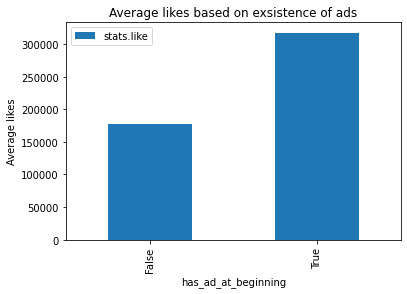

Text(0, 0.5, 'Average comments')

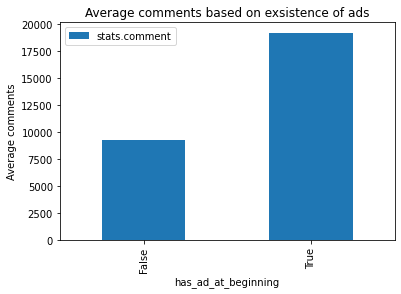

Text(0, 0.5, 'Average views')

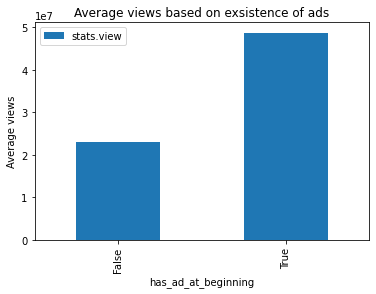

In [54]:
# We plot the averagepopularity (likes, comments, views) compared to the exsistence of ads
ax_likes = has_ad_likes.plot.bar(x= 'has_ad_at_beginning', y= 'stats.like', title= "Average likes based on exsistence of ads")
ax_likes.set_ylabel("Average likes")
plt.show()
ax_comments= has_ad_comments.plot.bar(x= 'has_ad_at_beginning', y= 'stats.comment',  title= "Average comments based on exsistence of ads")
ax_comments.set_ylabel("Average comments")
plt.show()
ax_views= has_ad_views.plot.bar(x= 'has_ad_at_beginning', y= 'stats.view', title= "Average views based on exsistence of ads")
ax_views.set_ylabel("Average views")
plt.show()

The plots above compare the vidoes that had an ad at the begining of the vidoe and videos that do not have ads at the begining of a video. The first plot compares has_ad_at_begining to the average likes. The second plot compares has_ad_at_begining to average comments and the final lot compares has_ad_at_begining to average views. We can see that in all three cases, the popularity of the videos is higher when there is an ad attached to the video. 

Text(0, 0.5, 'Average likes')

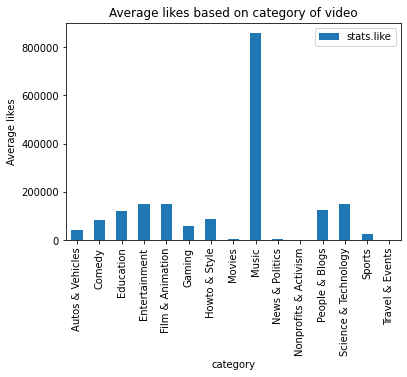

Text(0, 0.5, 'Average comments')

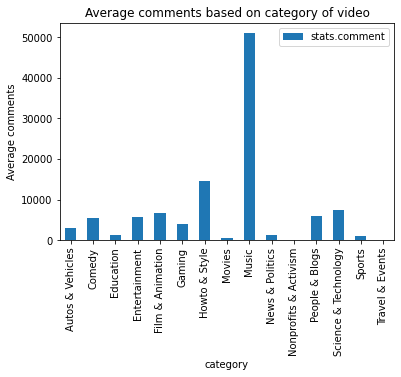

Text(0, 0.5, 'Average views')

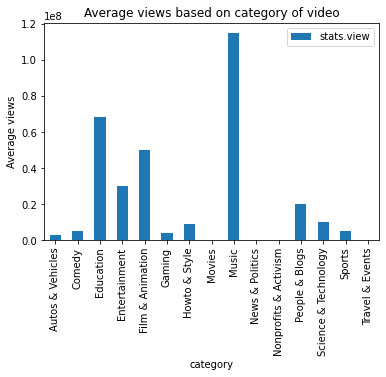

In [55]:
# We plot the averagepopularity (likes, comments, views) compared to the category of the videos
ax_category_likes = category_likes.plot.bar(x= 'category', y= 'stats.like', title= "Average likes based on category of video")
ax_category_likes.set_ylabel("Average likes")
plt.show()
ax_category_comments = category_comments.plot.bar(x= 'category', y= 'stats.comment', title= "Average comments based on category of video")
ax_category_comments.set_ylabel("Average comments")
plt.show()
ax_category_views = category_view.plot.bar(x= 'category', y= 'stats.view', title= "Average views based on category of video")
ax_category_views.set_ylabel("Average views")
plt.show()

The plots above compare the the category of the videos and to the popularity of videos The first plot compares category to the average likes. The second plot compares category to average comments and the final lot compares category to average views. We can see that in all three cases, that the music category has high popularity is comparison to the other categories. We also notice that within popularity, views are high in the pets and animals category.

<AxesSubplot:xlabel='bin', ylabel='Likes'>

Text(0.5, 1.0, 'Likes vs Tags')

Text(0.5, 0, 'Number of Tags (Count)')

Text(0, 0.5, 'Number of Likes (Thousands)')

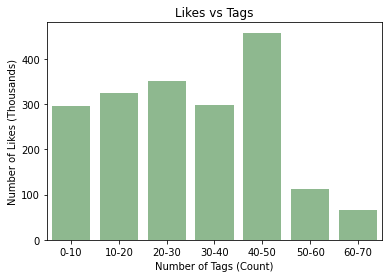

In [56]:
# Compare the number of likes to number of tags

# Fixes the issue where 0 tages was not being binned into first bin
tags_likes.at[0,'Tags'] = 1
tags_likes['bin'] = pd.cut(tags_likes['Tags'], bins=range(0,71,10), labels=[f'{l}-{l+10}' for l in range(0,61,10)])

sns.barplot(x='bin', y='Likes', color="#87bf89", data=tags_likes, ci=None)
plt.title("Likes vs Tags")
plt.xlabel("Number of Tags (Count)")
plt.ylabel("Number of Likes (Thousands)")

[Text(0.5, 0, 'Number of Tags'), Text(0, 0.5, 'Number of Likes')]

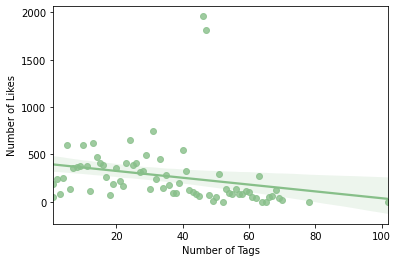

In [57]:
ax3 = sns.regplot(x="Tags", y= "Likes", color= "#87bf89", data=tags_likes)
ax3.set(xlabel='Number of Tags', ylabel='Number of Likes')

<AxesSubplot:xlabel='bin', ylabel='Comments'>

Text(0.5, 1.0, 'Comments vs Tags')

Text(0.5, 0, 'Number of Tags (Count)')

Text(0, 0.5, 'Number of Comments (Thousands)')

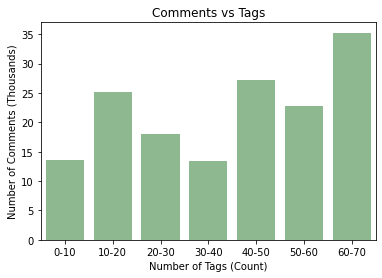

In [58]:
# Compare the number of comments to number of tags

#Fixes the issue where 0 tages was not being binned into first bin
tags_comments.at[0,'Tags'] = 1
tags_comments['bin'] = pd.cut(tags_likes['Tags'], bins=range(0,71,10), labels=[f'{l}-{l+10}' for l in range(0,61,10)])

sns.barplot(x='bin', y='Comments', color="#87bf89", data=tags_comments, ci=None)
plt.title("Comments vs Tags")
plt.xlabel("Number of Tags (Count)")
plt.ylabel("Number of Comments (Thousands)")

<AxesSubplot:xlabel='bin', ylabel='Views'>

Text(0.5, 1.0, 'Views vs Tags')

Text(0.5, 0, 'Number of Tags (Count)')

Text(0, 0.5, 'Number of Views (Hundred Thousands)')

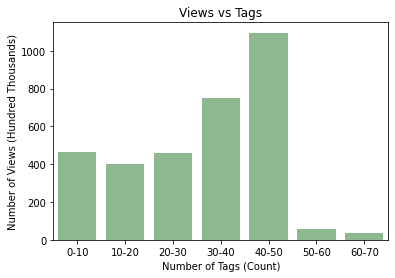

In [59]:
# Compare the number of views to number of tags

#Fixes the issue where 0 tags was not being binned into first bin
tags_views.at[0,'Tags'] = 1
tags_views['bin'] = pd.cut(tags_likes['Tags'], bins=range(0,71,10), labels=[f'{l}-{l+10}' for l in range(0,61,10)])

sns.barplot(x='bin', y='Views', color="#87bf89", data=tags_views, ci=None)
plt.title("Views vs Tags")
plt.xlabel("Number of Tags (Count)")
plt.ylabel("Number of Views (Hundred Thousands)")

-The above three plots compare the number of tags to likes, comments, and views. When observing all three graphs, 40-50 tags consistently seem to perform relatively well in each metric. This is apparent in Likes vs Tags and Views vs Tags distribution, but less so in Comments vs Tags plot due to it being a bimodal distribution. 

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*